In [387]:
import pickle
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.lda import LDA
from sklearn.cluster import KMeans

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, adjusted_rand_score
from sklearn.cross_validation import cross_val_score

import seaborn as sns

%matplotlib inline

Sentences per author:  

Frances Perraudin 108  
Rowena Mason Political correspondent 114  
Sabrina Siddiqui 550  
Lauren Gambino 148  
Daniel Boffey 121  
Donna Ferguson 107  
Paul Lewis 607  
Tom McCarthy 499  
Tom Dart 172  
Dan Roberts 412  
Alan Yuhas 261  
Ben Jacobs 535  
Jeb Lund 417  

In [48]:
#naive model accuracy
607.0 / (108 + 114 + 550 + 148 + 121 + 107 + 607 + 499 + 172 + 412 + 261 + 535 + 417)

0.14983954579116268

Sentences per author:  
Ben Jacobs 535  
Sabrina Siddiqui 550  
Paul Lewis 607  
Dan Roberts 412  
Tom McCarthy 499  
Alan Yuhas 261  
Jeb Lund 417  

In [336]:
607./(535 + 550 + 607 + 412 + 499 + 261 + 417)

0.18500457177689728

Sentences per author:  
    
Ben Jacobs 675  
Sabrina Siddiqui 582  
Paul Lewis 678  
Dan Roberts 549  
Tom McCarthy 576  
Alan Yuhas 307  
Jeb Lund 520  

In [335]:
678.0 / (675 + 582 + 678 + 549 + 576 + 307 + 520)

0.17442757910985335

Sabrina Siddiqui 582  
Paul Lewis 678  
Tom McCarthy 576  
Dan Roberts 549  
Ben Jacobs 675  
Jeb Lund 520  

In [204]:
678.0/(582 + 678 + 576 + 549 + 675 + 520)

0.1893854748603352

In [297]:
r_state = 42
bestk = 6

In [374]:
with open("authors.pkl", 'r') as out_auths:
    authors = pickle.load(out_auths)
with open("features.pkl", 'r') as outs:
    features = pickle.load(outs)
with open("labels.pkl", 'r') as las:
    labels = pickle.load(las)

In [375]:
pprint(labels)

names = zip(*labels)[1]

pprint(names)

[(1, 'Paul Lewis'),
 (2, 'Dan Roberts'),
 (3, 'Jeb Lund'),
 (4, 'Tom McCarthy'),
 (5, 'Ben Jacobs'),
 (6, 'Sabrina Siddiqui')]
('Paul Lewis',
 'Dan Roberts',
 'Jeb Lund',
 'Tom McCarthy',
 'Ben Jacobs',
 'Sabrina Siddiqui')


In [376]:
print len(authors)
print len(features)

3580
3580


In [377]:
print len(features[0])
print authors[0]

166
1


In [378]:
X_train, X_test, y_train, y_test = train_test_split(features, authors, test_size=0.25, random_state=r_state)

In [379]:
print len(X_train), len(X_test)
print len(y_train), len(y_test)

2685 895
2685 895


In [380]:
print type(y_train)
print y_train[0]

<type 'list'>
5


In [381]:
models = {'logreg': LogisticRegression(),
          'rf': RandomForestClassifier(),
          'knn': KNeighborsClassifier(n_neighbors=bestk),
          'linsvc': LinearSVC(),
          'tree': DecisionTreeClassifier(),
          'gnb': GaussianNB(),
          'mnb': MultinomialNB(),
          'lda': LDA()
         }

pred_probs = {}
scores = {}
preds = {}

In [382]:
for mname, m in models.iteritems():
    print "*** %s" % mname
    m.fit(X_train, y_train)
    if mname != 'linsvc':
        pred_probs[mname] = {'train': m.predict_proba(X_train),  'test': m.predict_proba(X_test)}
    pred = m.predict(X_test)
    preds[mname] = pred
    prec, recall, fscore, sup = precision_recall_fscore_support(y_test, pred)
    scores[mname] = {'accuracy': accuracy_score(y_test, pred),
                     'precision': prec,
                     'recall': recall,
                     'fscore': fscore}

*** knn
*** gnb
*** rf
*** mnb
*** tree
*** lda
*** logreg
*** linsvc


In [383]:
pprint(scores)

{'gnb': {'accuracy': 0.2435754189944134,
         'fscore': array([ 0.15384615,  0.15384615,  0.22093023,  0.10526316,  0.35632184,
        0.02702703]),
         'precision': array([ 0.31666667,  0.35      ,  0.41304348,  0.23076923,  0.22206304,
        0.16666667]),
         'recall': array([ 0.10160428,  0.09859155,  0.15079365,  0.06818182,  0.90116279,
        0.01470588])},
 'knn': {'accuracy': 0.26480446927374302,
         'fscore': array([ 0.32231405,  0.22988506,  0.22702703,  0.31937173,  0.20640569,
        0.18274112]),
         'precision': array([ 0.26262626,  0.25210084,  0.3559322 ,  0.244     ,  0.26605505,
        0.29508197]),
         'recall': array([ 0.4171123 ,  0.21126761,  0.16666667,  0.46212121,  0.16860465,
        0.13235294])},
 'lda': {'accuracy': 0.34525139664804472,
         'fscore': array([ 0.32386364,  0.33088235,  0.39344262,  0.3557047 ,  0.34017595,
        0.33922261]),
         'precision': array([ 0.34545455,  0.34615385,  0.40677966,  0.31927

In [384]:
acc_k_score = []
ks = range(1,21)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    predicted = knn.predict(X_test)
    acc = accuracy_score(y_test, predicted)
    acc_k_score.append(acc)
    print "k:", k, "acc:", acc

k: 1 acc: 0.23687150838
k: 2 acc: 0.249162011173
k: 3 acc: 0.253631284916
k: 4 acc: 0.25251396648
k: 5 acc: 0.256983240223
k: 6 acc: 0.264804469274
k: 7 acc: 0.250279329609
k: 8 acc: 0.242458100559
k: 9 acc: 0.253631284916
k: 10 acc: 0.25251396648
k: 11 acc: 0.259217877095
k: 12 acc: 0.251396648045
k: 13 acc: 0.265921787709
k: 14 acc: 0.250279329609
k: 15 acc: 0.25251396648
k: 16 acc: 0.241340782123
k: 17 acc: 0.25251396648
k: 18 acc: 0.254748603352
k: 19 acc: 0.256983240223
k: 20 acc: 0.253631284916


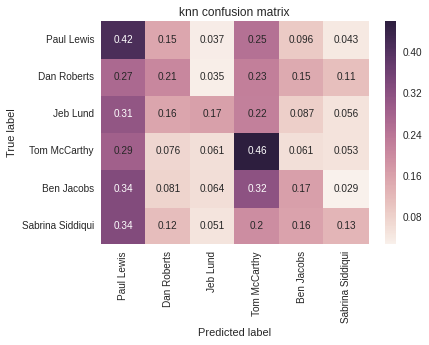

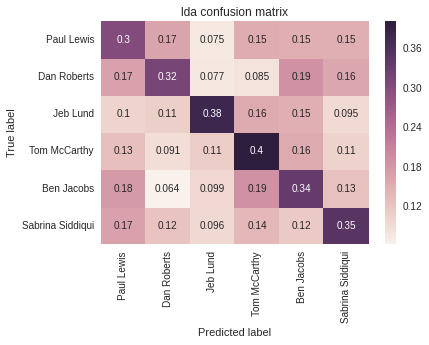

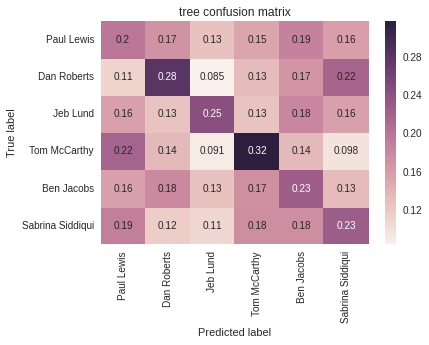

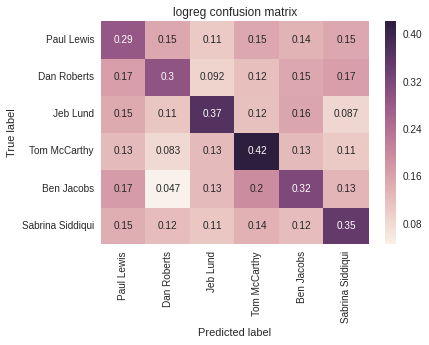

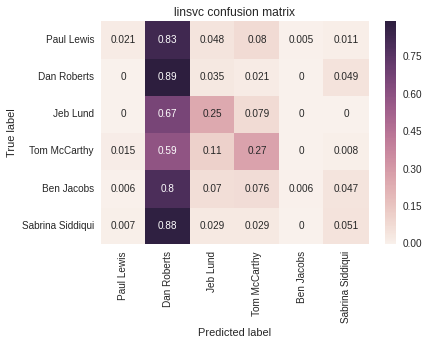

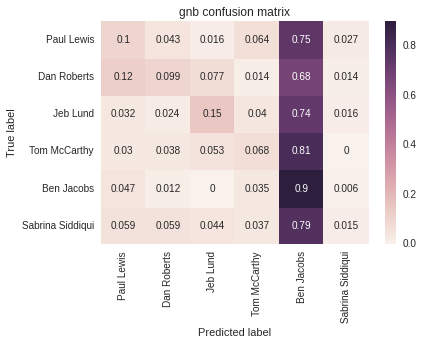

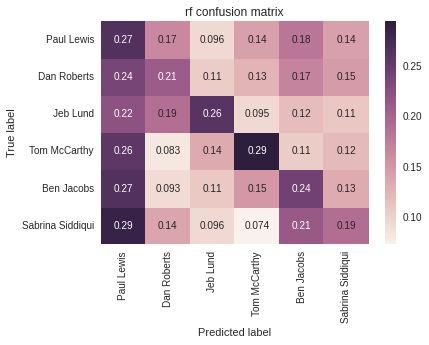

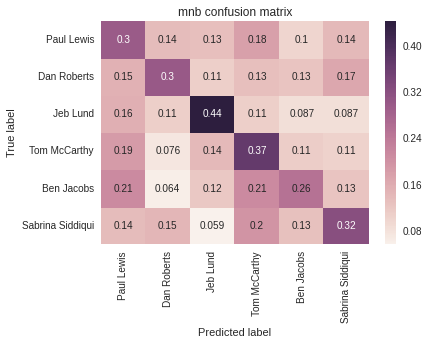

In [385]:
for mname, y_pred in preds.iteritems():
    cm = confusion_matrix(y_test, y_pred)
    cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 3)
    ax = sns.heatmap(cm, annot=True, xticklabels=names, yticklabels=names)
    plt.yticks(rotation=0) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("%s confusion matrix" %mname)
    sns.plt.show()